## **Handling Outliers**

Outliers are extreme values that deviate significantly from other observations. This notebook demonstrates how to detect and handle outliers in a practical, interview-ready way.

## **Import Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Create Sample Dataset with Outliers**

In [3]:
df = pd.DataFrame({
    'EmployeeID': range(1, 11),
    'Age': [23, 25, 27, 29, 31, 33, 35, 37, 120, 28],
    'Salary': [30000, 32000, 35000, 37000, 39000, 42000, 45000, 48000, 1000000, 36000]
})

df

,EmployeeID,Age,Salary
0,1,23,30000
1,2,25,32000
2,3,27,35000
3,4,29,37000
4,5,31,39000
5,6,33,42000
6,7,35,45000
7,8,37,48000
8,9,120,1000000
9,10,28,36000


## **Visualizing Outliers**

## **Box Plot**

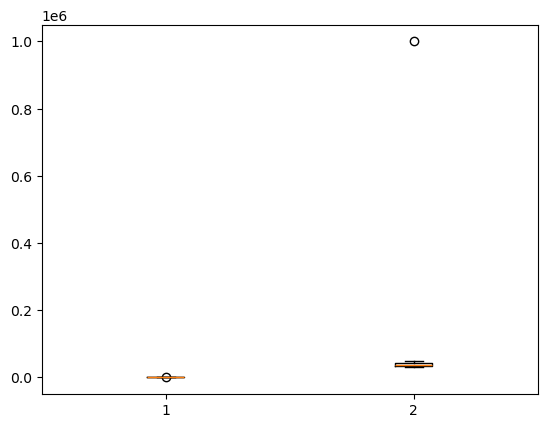

In [5]:
plt.boxplot(df[['Age', 'Salary']])
plt.show()

## **Histogram**

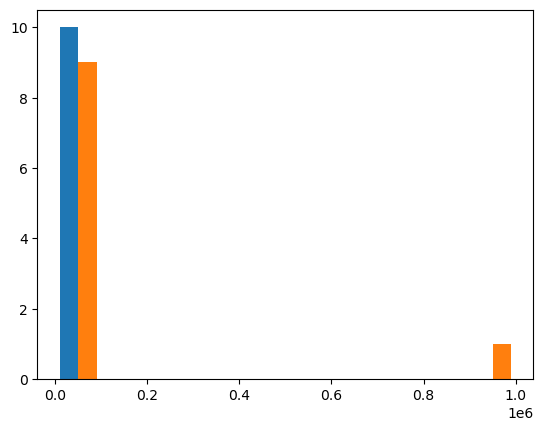

In [6]:
plt.hist(df[['Age', 'Salary']])
plt.show()

--------

## **Method 1: IQR (Interquartile Range)**

In [7]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]

,EmployeeID,Age,Salary
8,9,120,1000000


### **Remove Outliers using IQR - Trimming**

In [ ]:
df_iqr_cleaned = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]
df_iqr_cleaned

### **Remove Outliers using IQR - Capping (Winsorization)**

In [10]:
df["New_Salary"] = np.where(df["Salary"] < lower_bound, lower_bound, np.where(df["Salary"] > upper_bound, upper_bound, df["Salary"]))
df

,EmployeeID,Age,Salary,New_Salary
0,1,23,30000,30000.0
1,2,25,32000,32000.0
2,3,27,35000,35000.0
3,4,29,37000,37000.0
4,5,31,39000,39000.0
5,6,33,42000,42000.0
6,7,35,45000,45000.0
7,8,37,48000,48000.0
8,9,120,1000000,57750.0
9,10,28,36000,36000.0


## **Method 2: Z-Score**

In [13]:
from scipy import stats

df['z_score'] = np.abs(stats.zscore(df['Salary']))
df[df['z_score'] > 1]

,EmployeeID,Age,Salary,New_Salary,z_score
8,9,120,1000000,57750.0,2.999496


## **Capping / Winsorization**

In [14]:
lower_cap = df['Salary'].quantile(0.05)
upper_cap = df['Salary'].quantile(0.95)

df['Salary_Capped'] = np.where(df['Salary'] > upper_cap, upper_cap,
                               np.where(df['Salary'] < lower_cap, lower_cap, df['Salary']))

df[['Salary', 'Salary_Capped']]

,Salary,Salary_Capped
0,30000,30900.0
1,32000,32000.0
2,35000,35000.0
3,37000,37000.0
4,39000,39000.0
5,42000,42000.0
6,45000,45000.0
7,48000,48000.0
8,1000000,571600.0
9,36000,36000.0


---------

## When NOT to Remove Outliers

- Fraud detection
- Rare but valid business events
- High-value customers or transactions

## Conclusion

Outliers should never be removed blindly. The correct handling depends on data distribution and business context.

----